# ML — Wine Quality (Clasificación)

**Autor:**  
Eliana Ordoñez Cansimance  
Luis Gerardo Restrepo Arredondo  
Dilmer Noriel Gutiérrez Montenegro  

**Fecha:** 2025-10-25  
**Random State:** 42  

---

### 📋 Este notebook incluye:
- **EDA**
- **Preprocesamiento** (ColumnTransformer)
- **Modelos de clasificación** (target: `quality_category` o `quality_label`)
- **Evaluación** con validación cruzada *(accuracy, F1 macro, F1 weighted)*



In [56]:
# Librerias y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler

In [39]:
# Carga de datos

# Dataset de Clasificación
df_cls = pd.read_csv("data/wine_data_train_classification.csv")
print(df_cls.head())
print(f"Dataset Clasificación cargado: {df_cls.shape[0]} filas, {df_cls.shape[1]} columnas")

# Dataset de Regresión
df_reg = pd.read_csv("data/wine_data_train_regression.csv")
print(f"Dataset Regresión cargado: {df_reg.shape[0]} filas, {df_reg.shape[1]} columnas")

#información básica de los datasets
info_cls = pd.DataFrame({
    "Tipo de Dato": df_cls.dtypes,
    "Valores Nulos": df_cls.isnull().sum(),
    "Valores Únicos": df_cls.nunique(),
    "Valores No Nulos": df_cls.notnull().sum()
})

display(info_cls.style.background_gradient(cmap='Greens').set_caption("📋 Información General - Dataset Clasificación"))

info_reg = pd.DataFrame({
    "Tipo de Dato": df_reg.dtypes,
    "Valores Nulos": df_reg.isnull().sum(),
    "Valores Únicos": df_reg.nunique(),
    "Valores No Nulos": df_reg.notnull().sum()
})

display(info_reg.style.background_gradient(cmap='Oranges').set_caption("📋 Información General - Dataset Regresión"))




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.4              0.31         0.26            13.2      0.046   
1            6.6              0.29         0.31             3.9      0.027   
2            6.8              0.30         0.23             4.6      0.061   
3            6.6              0.25         0.35            14.0      0.069   
4            7.5              0.24         0.31            13.1      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 57.0                 205.0  0.99750  3.17       0.41   
1                 39.0                  96.0  0.99035  3.24       0.60   
2                 50.5                 238.5  0.99580  3.32       0.60   
3                 42.0                 163.0  0.99900  3.56       0.47   
4                 26.0                 180.0  0.99884  3.05       0.53   

   alcohol   type quality_category  quality_label  
0      9.6  white           Medium

,Tipo de Dato,Valores Nulos,Valores Únicos,Valores No Nulos
fixed acidity,float64,0,105,5847
volatile acidity,float64,0,184,5847
citric acid,float64,0,88,5847
residual sugar,float64,0,307,5847
chlorides,float64,0,207,5847
free sulfur dioxide,float64,0,132,5847
total sulfur dioxide,float64,0,275,5847
density,float64,0,973,5847
pH,float64,0,107,5847
sulphates,float64,0,109,5847


,Tipo de Dato,Valores Nulos,Valores Únicos,Valores No Nulos
fixed acidity,float64,0,104,5847
volatile acidity,float64,0,184,5847
citric acid,float64,0,89,5847
residual sugar,float64,0,313,5847
chlorides,float64,0,204,5847
free sulfur dioxide,float64,0,131,5847
total sulfur dioxide,float64,0,271,5847
density,float64,0,973,5847
pH,float64,0,107,5847
sulphates,float64,0,107,5847


In [ ]:
print("\n=== NULOS Y DUPLICADOS ===")
nulos_cls = pd.DataFrame({
    "Valores Nulos": df_cls.isnull().sum(),
    "Duplicados": [df_cls.duplicated().sum()] * len(df_cls.columns)
})
display(
    nulos_cls.style
        .background_gradient(cmap='Greens')
        .set_caption("📋 Nulos y Duplicados - Dataset Clasificación")
)

nulos_reg = pd.DataFrame({
    "Valores Nulos": df_reg.isnull().sum(),
    "Duplicados": [df_reg.duplicated().sum()] * len(df_reg.columns)
})
display(
    nulos_reg.style
        .background_gradient(cmap='Oranges')
        .set_caption("📋 Nulos y Duplicados - Dataset Regresión")
)

print(f"---Duplicados Clasificación: {df_cls.duplicated().sum()}")
print(f"---Duplicados Regresión: {df_reg.duplicated().sum()}")



=== NULOS Y DUPLICADOS ===


,Valores Nulos,Duplicados
fixed acidity,0,970
volatile acidity,0,970
citric acid,0,970
residual sugar,0,970
chlorides,0,970
free sulfur dioxide,0,970
total sulfur dioxide,0,970
density,0,970
pH,0,970
sulphates,0,970


,Valores Nulos,Duplicados
fixed acidity,0,969
volatile acidity,0,969
citric acid,0,969
residual sugar,0,969
chlorides,0,969
free sulfur dioxide,0,969
total sulfur dioxide,0,969
density,0,969
pH,0,969
sulphates,0,969


---Duplicados Clasificación: 970
---Duplicados Regresión: 969



Descripción estadística del dataset de Clasificación:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5847.000000       5847.000000  5847.000000     5847.000000   
mean        7.218616          0.339803     0.318659        5.465401   
std         1.299384          0.164542     0.144632        4.764590   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.200000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5847.000000          5847.000000           5847.000000  5847.000000   
mean      0.056071            30.671969            116.291859     0.994704   
std       0.035622            17.872105             56.506500     0.003

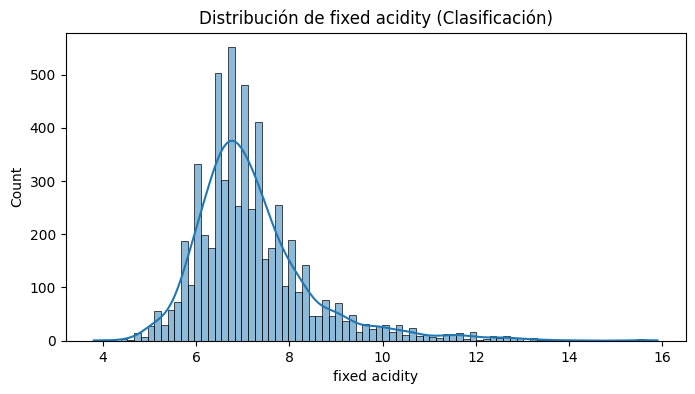

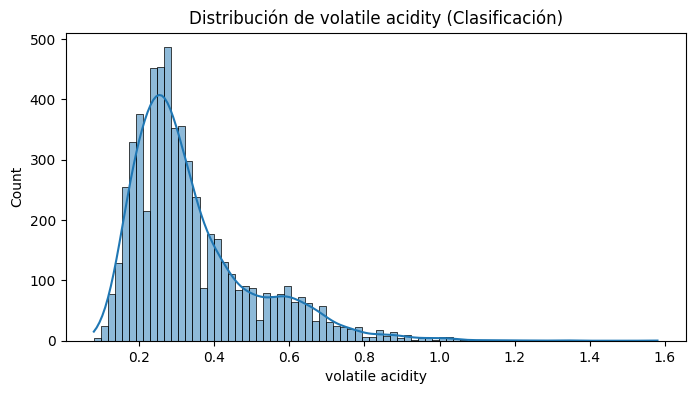

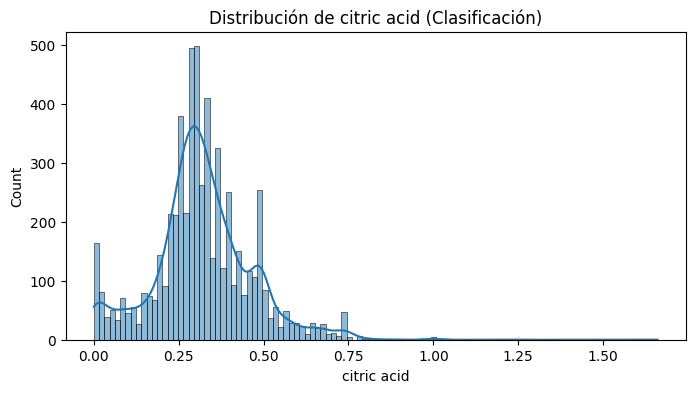

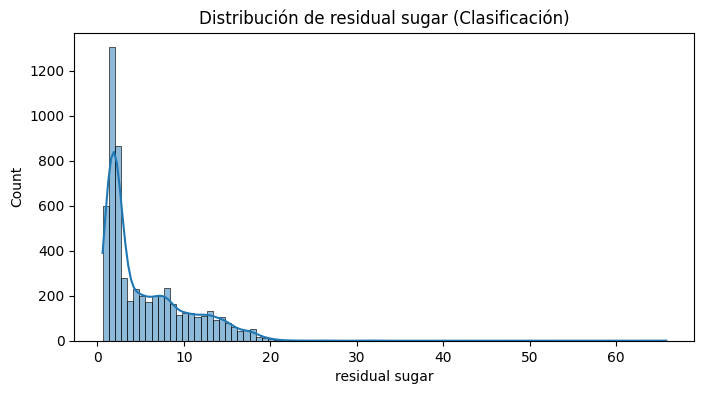

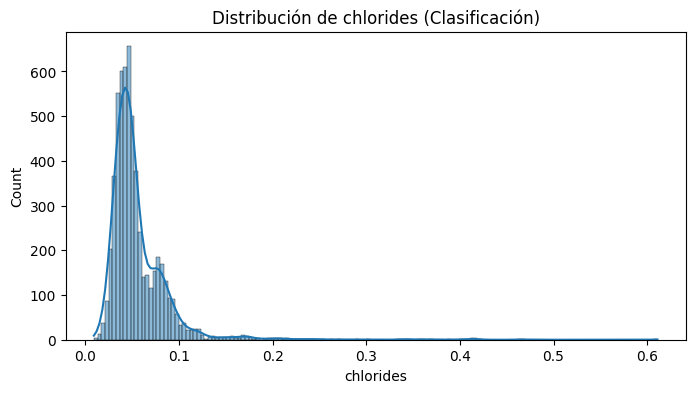

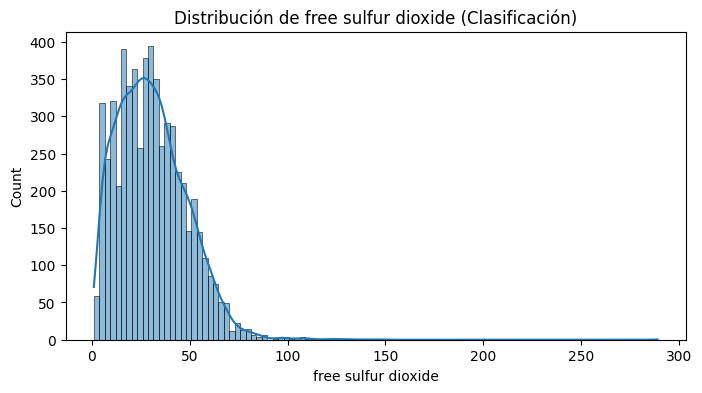

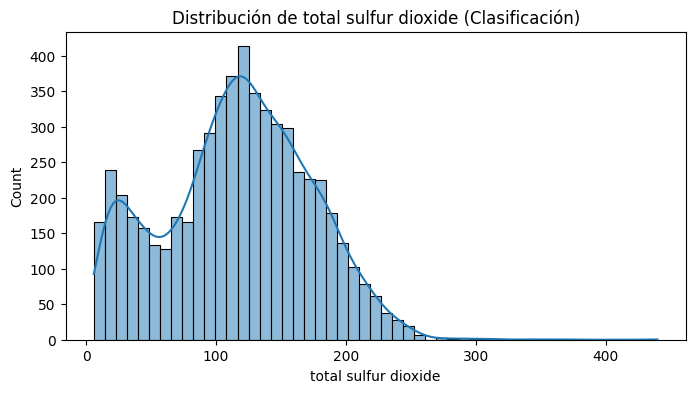

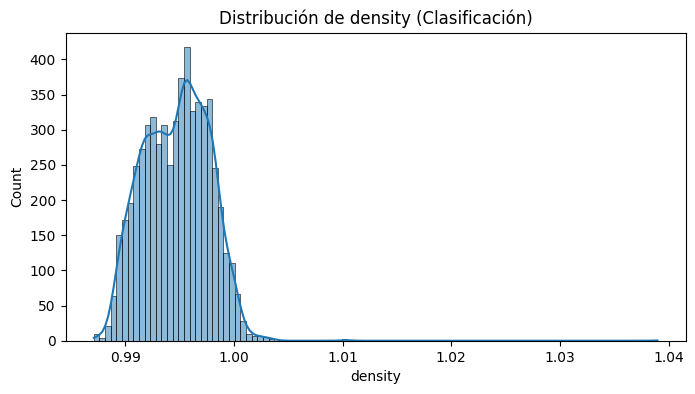

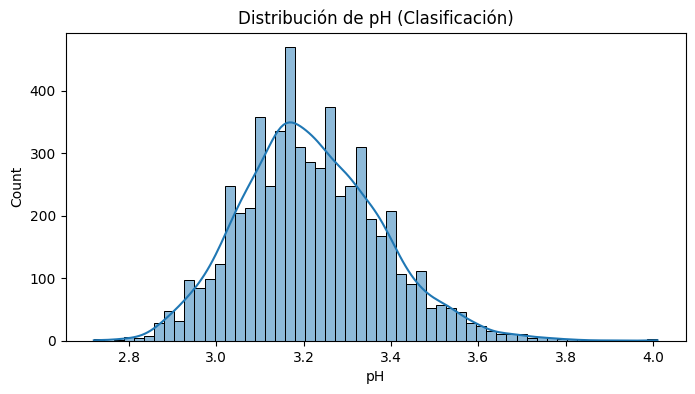

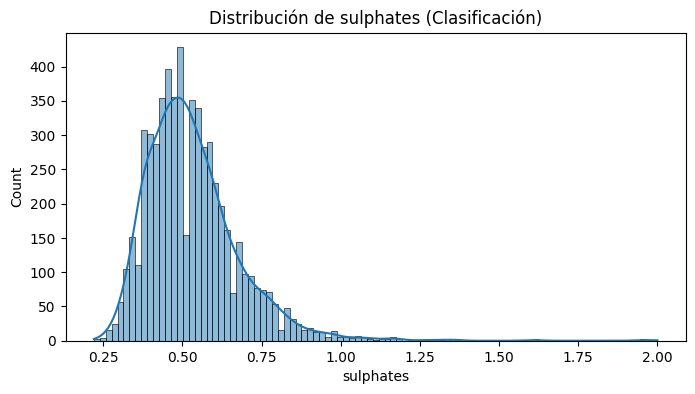

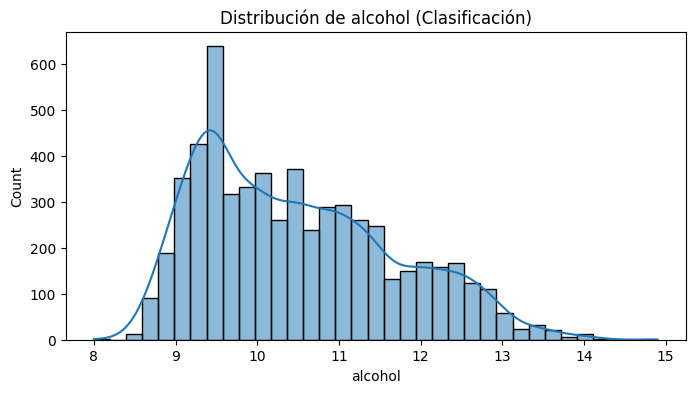

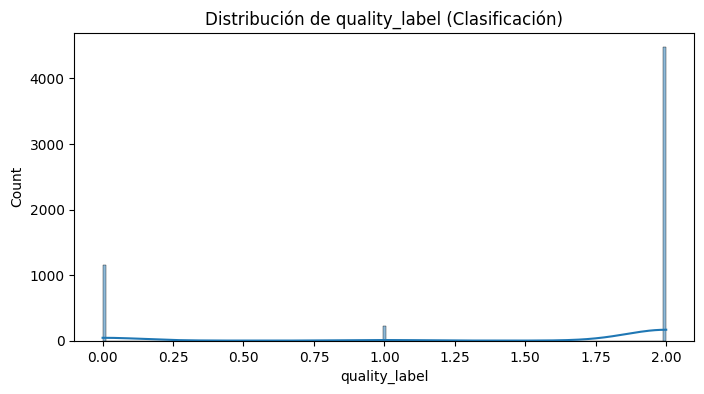

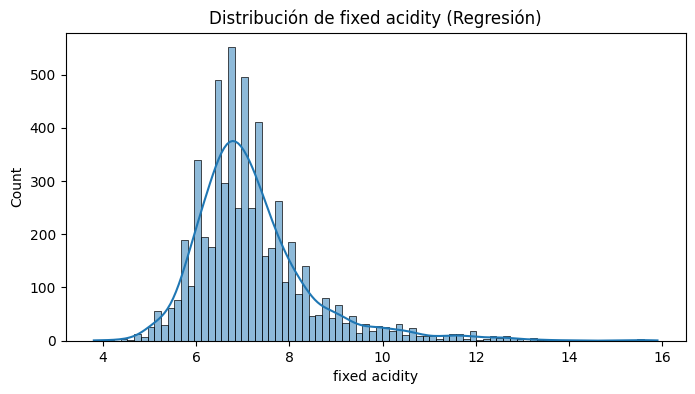

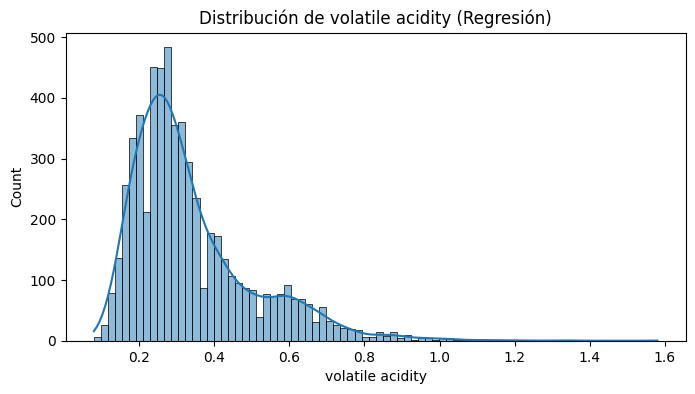

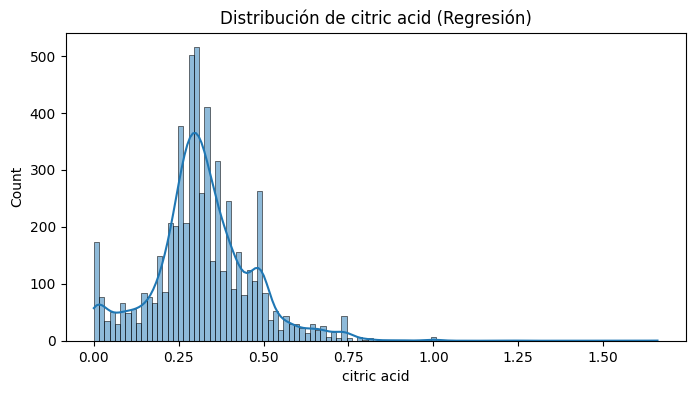

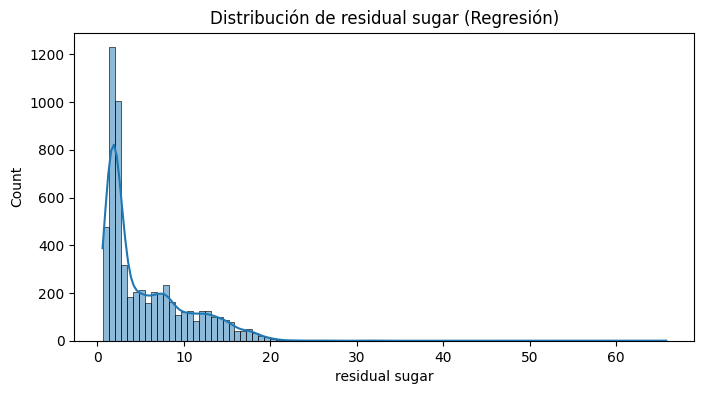

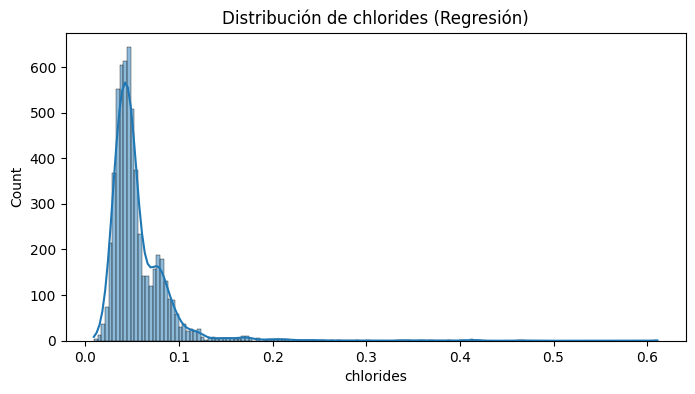

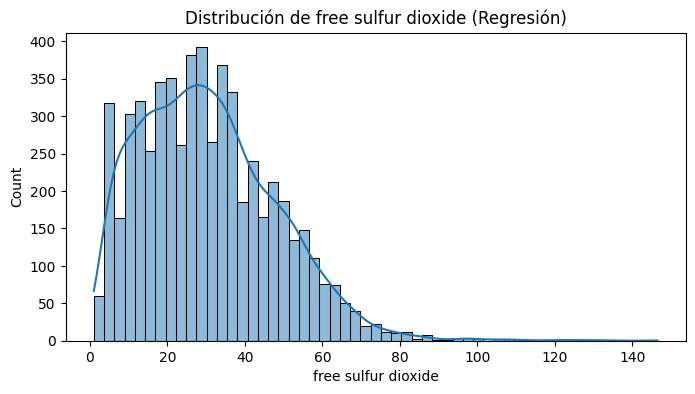

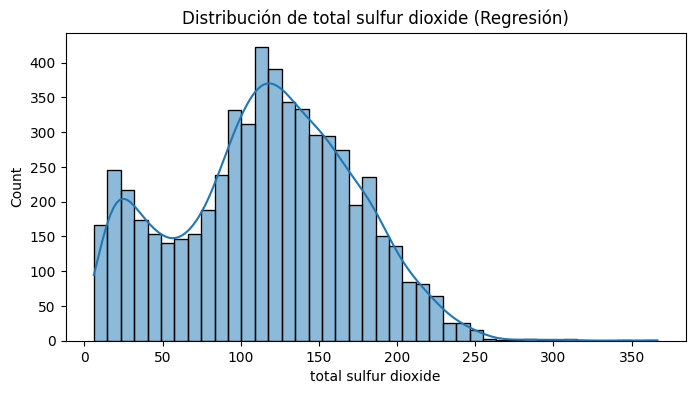

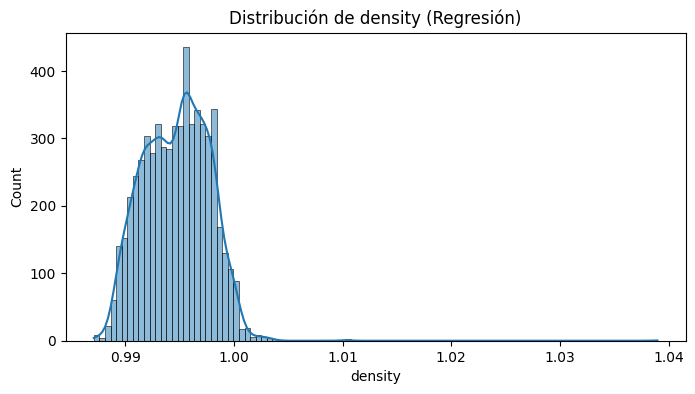

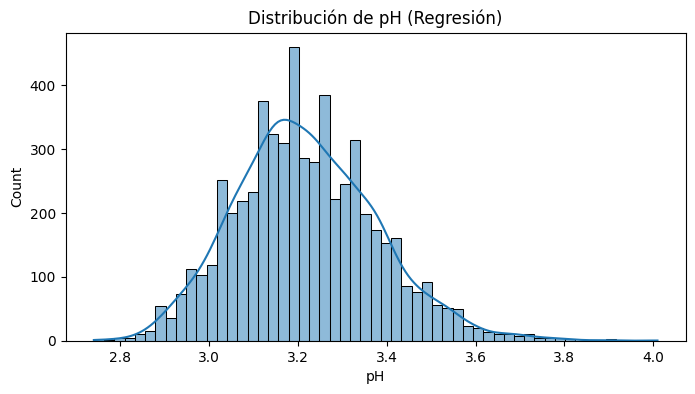

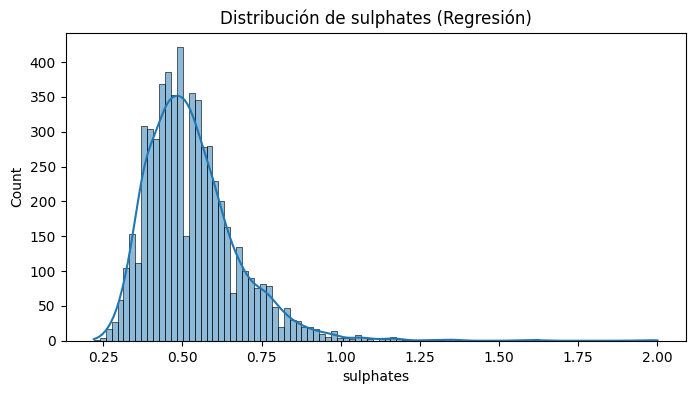

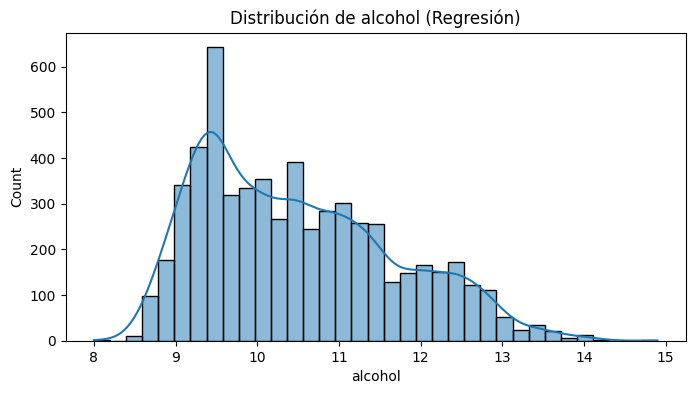

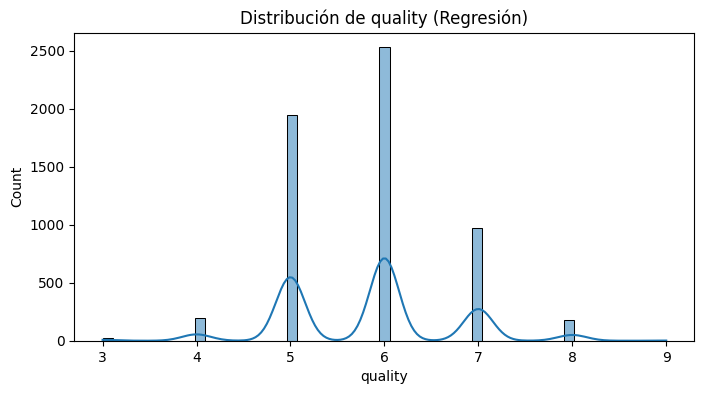

EDA Wines script loaded successfully.


In [ ]:

# Análisis estadístico descriptivo
print("\nDescripción estadística del dataset de Clasificación:")
print(df_cls.describe())    

print("\n Descripción estadística del dataset de Regresión:")
print(df_reg.describe())  

# Visualización de datos

# Identificación de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
    return out.shape[0]

print("\n=== OUTLIERS DETECTADOS (Clasificación) ===")
for c in df_cls.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_cls, c)}")
    print("\n=== OUTLIERS DETECTADOS (Regresión) ===")
for c in df_reg.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_reg, c)}")

# Visualización de distribuciones de variables numéricas
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns
for col in num_cols_cls:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cls[col], kde=True)
    plt.title(f'Distribución de {col} (Clasificación)')
    plt.show()
for col in num_cols_reg:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_reg[col], kde=True)
    plt.title(f'Distribución de {col} (Regresión)')
    plt.show()


In [75]:
# %% 1) LIMPIEZA (robusta y conservadora)
import numpy as np
import pandas as pd

# === Parámetros de limpieza ===
IQR_FACTOR = 2.0          # 1.5 elimina más; 2.0 es más conservador
OUTLIER_MODE = "winsor"   # "filter" = elimina filas, "winsor" = recorta a los límites
LOG_COLS = ['residual sugar', 'chlorides', 'sulphates']  # se aplica log1p si existen

def tratar_outliers_iqr(df, cols, iqr_factor=2.0, mode="winsor"):
    """Trata outliers por IQR SOLO en 'cols'.
       mode='winsor' recorta (conserva filas); mode='filter' elimina filas."""
    df2 = df.copy()
    for c in cols:
        Q1, Q3 = df2[c].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        li, ls = Q1 - iqr_factor*IQR, Q3 + iqr_factor*IQR
        if mode == "filter":
            df2 = df2[(df2[c] >= li) & (df2[c] <= ls)]
        else:
            df2.loc[df2[c] < li, c] = li
            df2.loc[df2[c] > ls, c] = ls
    return df2

def limpiar_dataset_cls(df_cls):
    # Detectar target de clasificación
    target = 'quality_label' if 'quality_label' in df_cls.columns else 'quality_category'
    df = df_cls.copy()

    # 1) Quitar duplicados y nulos
    df.drop_duplicates(inplace=True)
    df.dropna(axis=0, how="any", inplace=True)

    # 2) Tratar outliers SOLO en predictores numéricos (no tocar target)
    num_pred = df.drop(columns=[target]).select_dtypes(include=[np.number]).columns.tolist()
    df = tratar_outliers_iqr(df, num_pred, iqr_factor=IQR_FACTOR, mode=OUTLIER_MODE)

    # 3) Transformaciones log para variables sesgadas (si existen)
    for c in LOG_COLS:
        if c in df.columns:
            df[c] = np.log1p(df[c])

    # 4) Reset index final
    df = df.reset_index(drop=True)
    return df, target

def limpiar_dataset_reg(df_reg):
    df = df_reg.copy()
    target = 'quality'  # numérica
    # 1) Duplicados y nulos
    df.drop_duplicates(inplace=True)
    df.dropna(axis=0, how="any", inplace=True)
    # 2) Outliers en numéricas (todas son predictores menos 'quality')
    num_pred = df.drop(columns=[target]).select_dtypes(include=[np.number]).columns.tolist()
    df = tratar_outliers_iqr(df, num_pred, iqr_factor=IQR_FACTOR, mode=OUTLIER_MODE)
    # 3) Transformaciones log (opcional, mismas columnas si existen)
    for c in LOG_COLS:
        if c in df.columns:
            df[c] = np.log1p(df[c])
    df = df.reset_index(drop=True)
    return df, target

# === Ejecutar limpieza
df_cls_clean, target_cls = limpiar_dataset_cls(df_cls)
df_reg_clean, target_reg = limpiar_dataset_reg(df_reg)

# === Resumen
print("✅ LIMPIEZA COMPLETA")
print(f"Clasificación: {df_cls_clean.shape} | Target: {target_cls}")
print(df_cls_clean[target_cls].value_counts().sort_index())
print(f"\nRegresión: {df_reg_clean.shape} | Target: {target_reg}")



✅ LIMPIEZA COMPLETA
Clasificación: (4877, 14) | Target: quality_label
quality_label
0     930
1     213
2    3734
Name: count, dtype: int64

Regresión: (4878, 13) | Target: quality


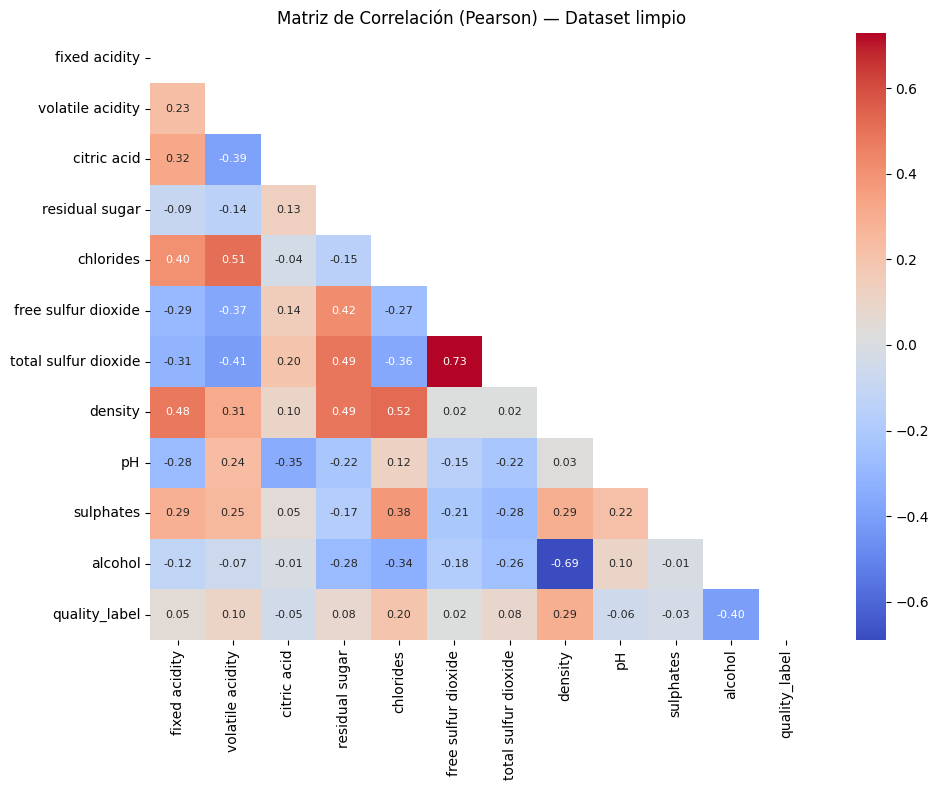


=== Correlaciones fuertes |r| > 0.5 (pearson) ===
free sulfur dioxide ↔ total sulfur dioxide: 0.729
density ↔ alcohol: -0.689
chlorides ↔ density: 0.523
volatile acidity ↔ chlorides: 0.509


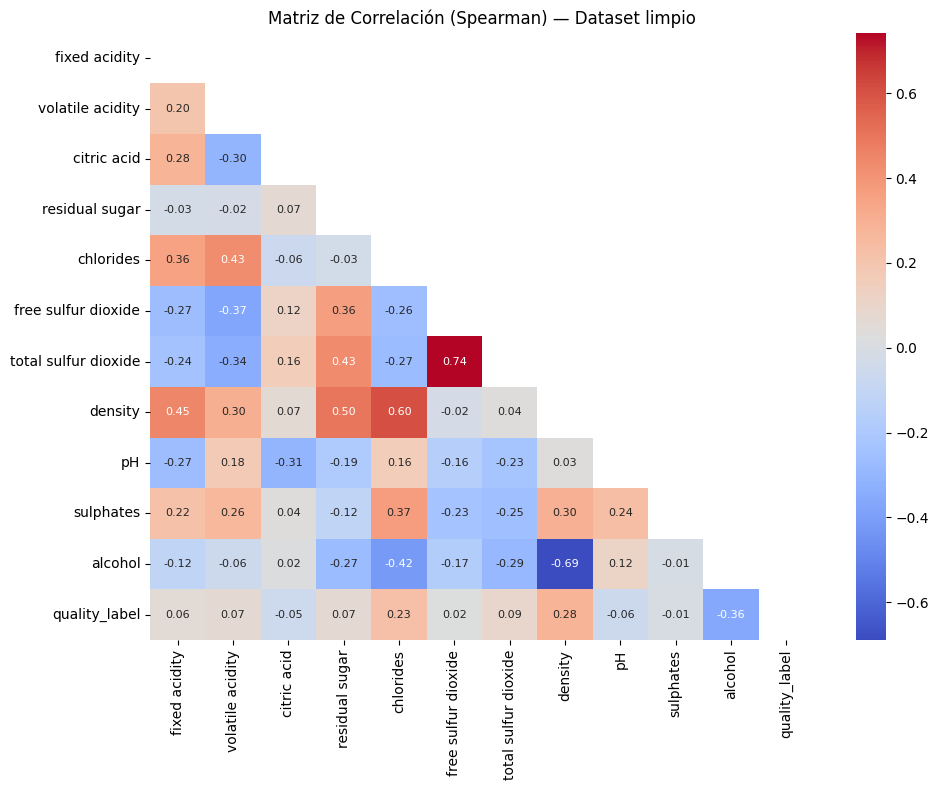


=== Correlaciones fuertes |r| > 0.5 (spearman) ===
free sulfur dioxide ↔ total sulfur dioxide: 0.742
density ↔ alcohol: -0.689
chlorides ↔ density: 0.605


In [76]:
# ===============================
# SCRIPT 2/5 — MATRIZ DE CORRELACIÓN
# ===============================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def matriz_correlacion(df, target_col=None, metodo="pearson", umbral=0.5, titulo_extra=""):
    """
    - Calcula y grafica la matriz de correlación (Pearson/Spearman) solo con columnas numéricas.
    - target_col (opcional): se incluye en la matriz pero se puede destacar aparte.
    - umbral: para listar pares con |r| > umbral (sin duplicados).
    Retorna: corr (DataFrame de correlaciones).
    """
    # Solo numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if not num_cols:
        raise ValueError("No hay columnas numéricas para correlacionar.")
    corr = df[num_cols].corr(method=metodo)

    # Heatmap (triángulo superior oculto)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
                annot_kws={"size": 8})
    titulo = f"Matriz de Correlación ({metodo.capitalize()})"
    if titulo_extra:
        titulo += f" — {titulo_extra}"
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

    # Listado de correlaciones fuertes (sin duplicados ni la diagonal)
    pares = []
    cols = corr.columns.tolist()
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            r = corr.iloc[i, j]
            if abs(r) > umbral and not np.isnan(r):
                pares.append((cols[i], cols[j], float(r)))
    pares_ordenados = sorted(pares, key=lambda x: abs(x[2]), reverse=True)

    print(f"\n=== Correlaciones fuertes |r| > {umbral} ({metodo}) ===")
    if not pares_ordenados:
        print("No se encontraron pares por encima del umbral.")
    else:
        for a, b, r in pares_ordenados:
            estrella = ""
            if target_col and (a == target_col or b == target_col):
                estrella = "  <— relacionado con target"
            print(f"{a} ↔ {b}: {r:.3f}{estrella}")

    return corr

# ---------- Uso recomendado ----------
# Si vienes del Script 1/5, deberías tener df_cls_clean. Si no, usa df_cls.
df_corr_base = globals().get("df_cls_clean", df_cls).copy()

# Indica el target si existe (para resaltarlo en el listado)
target_col = "quality_label" if "quality_label" in df_corr_base.columns else None

# 1) Correlación de Pearson (lineal)
corr_pearson = matriz_correlacion(df_corr_base, target_col=target_col,
                                  metodo="pearson", umbral=0.5,
                                  titulo_extra="Dataset limpio")

# 2) Correlación de Spearman (monótona, más robusta a no-linealidad)
corr_spearman = matriz_correlacion(df_corr_base, target_col=target_col,
                                 metodo="spearman", umbral=0.5,
                                 titulo_extra="Dataset limpio")

In [ ]:
# ===============================
# SCRIPT 3/5 — PREPARACIÓN
# ===============================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# 0) Tomar el dataset limpio si existe; si no, usar el original
df_base = globals().get("df_cls_clean", df_cls).copy()

# 1) Identificar la variable objetivo (numérica preferida)
if "quality_label" in df_base.columns:
    target_col = "quality_label"          # numérica (0/1/2)
elif "quality_category" in df_base.columns:
    target_col = "quality_category"       # categórica -> codificar abajo
else:
    raise ValueError("No encuentro ni 'quality_label' ni 'quality_category'.")

# 2) Separar X/y
X = df_base.drop(columns=[target_col]).copy()
y = df_base[target_col].copy()

# Si y es texto/categórica, convertir a números (para modelos/SMOTE)
if y.dtype == "object" or str(y.dtype).startswith("category"):
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Mapa de etiquetas (y):", dict(zip(le.classes_, le.transform(le.classes_))))

# 3) Detectar columnas numéricas y categóricas en X
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# 4) Split estratificado (evita fuga de datos)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 5) Preprocesador (fit SOLO en train)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

X_train_p = preprocessor.fit_transform(X_train)
X_test_p  = preprocessor.transform(X_test)

print("✔️ Preprocesamiento aplicado (fit en train, transform en test).")
print(f"Shapes → X_train_p: {X_train_p.shape} | X_test_p: {X_test_p.shape}")

# 6) Utilidad: obtener nombres de features tras el ColumnTransformer
def get_feature_names(ct: ColumnTransformer) -> list:
    names = []
    for name, trans, cols in ct.transformers_:
        if name == "remainder" and trans == "drop":
            continue
        if hasattr(trans, "get_feature_names_out"):
            # OneHotEncoder u otros con nombres expandidos
            try:
                out = trans.get_feature_names_out(cols)
            except TypeError:
                out = trans.get_feature_names_out()
            names.extend(out.tolist())
        else:
            # Transformadores sin get_feature_names_out (e.g., StandardScaler)
            if isinstance(cols, (list, tuple, np.ndarray, pd.Index)):
                names.extend([str(c) for c in cols])
            else:
                names.append(str(cols))
    return names

feature_names = get_feature_names(preprocessor)
print(f"Número de features finales: {len(feature_names)}")


✔️ Preprocesamiento aplicado (fit en train, transform en test).
Shapes → X_train_p: (3413, 14) | X_test_p: (1464, 14)
Número de features finales: 14


In [80]:
# ===============================
# SCRIPT 4/5 — BALANCEO (SMOTE)
# ===============================
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

# --- Requisitos previos del Script 3:
# X_train, X_test, y_train, y_test       -> datos crudos
# X_train_p, X_test_p                    -> datos ya preprocesados
# preprocessor                           -> ColumnTransformer (fit en train)
# num_cols, cat_cols, feature_names      -> listas de columnas

# 1) BALANCEO PARA HOLD-OUT (sobre X_train_p / y_train)
cls_counts = pd.Series(y_train).value_counts().sort_index()
min_count = int(cls_counts.min())
k_neighbors = max(1, min(5, min_count - 1))  # seguro cuando hay pocas muestras

print("\n=== BALANCEO (SMOTE) — HOLD-OUT ===")
print("Distribución original en y_train:\n", cls_counts)
print(f"Usando k_neighbors={k_neighbors}")

smote_holdout = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_bal, y_train_bal = smote_holdout.fit_resample(X_train_p, y_train)

print("Distribución después de SMOTE (hold-out):\n",
      pd.Series(y_train_bal).value_counts().sort_index())

# Variables de salida del bloque hold-out:
# X_train_bal, y_train_bal  (para entrenar un modelo y evaluar en X_test_p, y_test)


# 2) PIPELINE PARA CV (balanceo por fold) — base para búsqueda bayesiana
#    Creamos un preprocessor FRESCO (sin fit) para usar DENTRO de la CV.
preprocessor_cv = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

# Clasificador (placeholder). En el siguiente script podrás usar BayesSearchCV
# u otra búsqueda y tunear sus hiperparámetros dentro del pipeline.
clf = RandomForestClassifier(random_state=42, n_jobs=-1)

pipe_cv = Pipeline(steps=[
    ("pre", preprocessor_cv),               # se ajusta en cada fold
    ("smote", SMOTE(random_state=42)),      # balanceo por fold (¡clave!)
    ("clf", clf)
])

print("\n✔️ Pipeline para CV creado: preprocessor + SMOTE + clf")
print("   Variable disponible: pipe_cv (lista para BayesSearchCV/RandomizedSearchCV).")


=== BALANCEO (SMOTE) — HOLD-OUT ===
Distribución original en y_train:
 quality_label
0     651
1     149
2    2613
Name: count, dtype: int64
Usando k_neighbors=5
Distribución después de SMOTE (hold-out):
 quality_label
0    2613
1    2613
2    2613
Name: count, dtype: int64

✔️ Pipeline para CV creado: preprocessor + SMOTE + clf
   Variable disponible: pipe_cv (lista para BayesSearchCV/RandomizedSearchCV).



🔎 Ejecutando BayesSearchCV (5-fold, scoring=F1-macro)...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fit

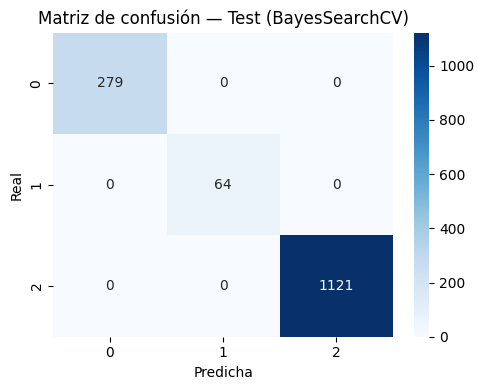


Top-10 resultados CV:
 rank_test_score  mean_test_score  std_test_score                                                                                                                                                                                    params
               1              1.0             0.0   {'clf__bootstrap': True, 'clf__max_depth': 30, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 7, 'clf__n_estimators': 531, 'smote__k_neighbors': 5}
               1              1.0             0.0 {'clf__bootstrap': False, 'clf__max_depth': 36, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 9, 'clf__n_estimators': 250, 'smote__k_neighbors': 4}
               1              1.0             0.0   {'clf__bootstrap': True, 'clf__max_depth': 37, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 4, 'clf__n_estimators': 563, 'smote__k_neighbors': 4}
               1              1.0

In [85]:
# %% BÚSQUEDA BAYESIANA (BayesSearchCV) con SMOTE en cada fold
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# pipe_cv viene del Script 4: Pipeline([("pre", ...), ("smote", SMOTE()), ("clf", RandomForestClassifier())])

# ----- Espacio de búsqueda (nombres con el prefijo del paso en el pipeline)
search_space = {
    # SMOTE (por fold)
    "smote__k_neighbors": Integer(3, 10),

    # RandomForest
    "clf__n_estimators": Integer(200, 1000),
    "clf__max_depth": Integer(5, 40),               # (usar None en una 2ª ronda si quieres)
    "clf__min_samples_split": Integer(2, 10),
    "clf__min_samples_leaf": Integer(1, 10),
    "clf__max_features": Categorical(["sqrt", "log2"]),
    "clf__bootstrap": Categorical([True, False]),
    # "clf__class_weight": Categorical([None, "balanced"])  # opcional si NO usas SMOTE
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

bayes = BayesSearchCV(
    estimator=pipe_cv,                  # pre + smote + rf
    search_spaces=search_space,
    n_iter=40,                          # puedes subir a 60–100 si quieres más fino
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1,
    refit=True,                         # reentrena el mejor en todo el train
    verbose=1,
    random_state=42
)

print("\n🔎 Ejecutando BayesSearchCV (5-fold, scoring=F1-macro)...")
bayes.fit(X_train, y_train)             # OJO: datos CRUDOS; el pipeline se encarga

print("\n✅ Búsqueda bayesiana completada.")
print(f"Mejor F1-macro (CV): {bayes.best_score_:.4f}")
print("Mejores hiperparámetros:")
for k, v in bayes.best_params_.items():
    print(f"  - {k}: {v}")

best_model = bayes.best_estimator_      # pipeline completo (pre + smote + rf)

# ----- Evaluación en TEST (datos CRUDOS)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
f1m = f1_score(y_test, y_pred, average="macro")
f1w = f1_score(y_test, y_pred, average="weighted")

print("\n=== MÉTRICAS EN TEST (modelo bayesiano) ===")
print(f"Accuracy:      {acc:.4f}")
print(f"F1 (macro):    {f1m:.4f}")
print(f"F1 (weighted): {f1w:.4f}")
print("\nReporte por clase:\n", classification_report(y_test, y_pred))

# ----- Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión — Test (BayesSearchCV)")
plt.xlabel("Predicha"); plt.ylabel("Real")
plt.tight_layout(); plt.show()

# ----- (Opcional) Tabla ordenada de los mejores intentos
results_df = pd.DataFrame(bayes.cv_results_).sort_values("rank_test_score")
cols_show = ["rank_test_score", "mean_test_score", "std_test_score", "params"]
print("\nTop-10 resultados CV:")
print(results_df[cols_show].head(10).to_string(index=False))


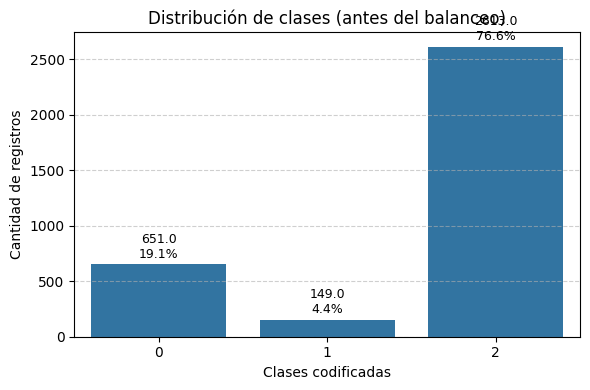

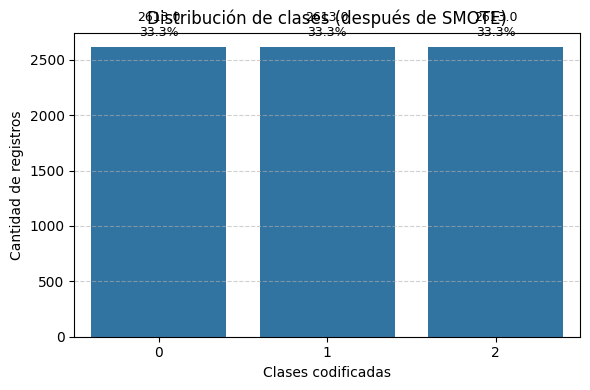


=== MÉTRICAS EN TEST ===
Accuracy:       1.0000
F1 (macro):     1.0000
F1 (weighted):  1.0000

Reporte por clase:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00      1121

    accuracy                           1.00      1464
   macro avg       1.00      1.00      1.00      1464
weighted avg       1.00      1.00      1.00      1464



In [88]:
# ===============================
# SCRIPT 5/5 — GRÁFICAS (CLASIFICACIÓN)
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, auc,
                             precision_recall_curve, average_precision_score)
from sklearn.preprocessing import label_binarize

# ---------- utilidades de gráficos ----------
def plot_class_dist(y, title="Distribución de clases"):
    serie = pd.Series(y, name="Clase").astype(int)
    conteos = serie.value_counts().sort_index()
    total = int(conteos.sum())
    dfp = pd.DataFrame({"Clase": conteos.index, "Conteo": conteos.values})
    dfp["%"] = (100 * dfp["Conteo"] / total).round(1)

    plt.figure(figsize=(6,4))
    ax = sns.barplot(data=dfp, x="Clase", y="Conteo")
    ax.set_title(title)
    ax.set_xlabel("Clases codificadas")
    ax.set_ylabel("Cantidad de registros")
    for i,row in dfp.iterrows():
        ax.text(i, row["Conteo"] + max(1, total*0.01),
                f'{row["Conteo"]}\n{row["%"]}%', ha='center', va='bottom', fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout(); plt.show()

def plot_confusion(y_true, y_pred, title="Matriz de confusión"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title); plt.xlabel("Predicha"); plt.ylabel("Real")
    plt.tight_layout(); plt.show()

def plot_feature_importances(model, feature_names=None, top_n=15):
    if not hasattr(model, "feature_importances_"):
        print("El modelo no expone feature_importances_.")
        return
    importancias = pd.Series(model.feature_importances_,
                             index=feature_names if feature_names is not None
                             else [f"f{i}" for i in range(len(model.feature_importances_))])
    top = importancias.sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(7,5))
    sns.barplot(x=top.values, y=top.index)
    plt.title(f"Top-{top_n} Importancias (Random Forest)")
    plt.xlabel("Importancia"); plt.ylabel("Feature")
    plt.tight_layout(); plt.show()

def plot_roc_pr_multiclass(y_true, proba, title_suffix=""):
    classes = np.unique(y_true)
    y_bin = label_binarize(y_true, classes=classes)
    # ROC
    plt.figure(figsize=(6,5))
    roc_aucs = []
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr); roc_aucs.append(roc_auc)
        plt.plot(fpr, tpr, label=f"Clase {c} (AUC={roc_auc:.2f})")
    plt.plot([0,1], [0,1], 'k--')
    plt.title(f"ROC One-vs-Rest {title_suffix}")
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.legend(); plt.tight_layout(); plt.show()

    # PR
    plt.figure(figsize=(6,5))
    aps = []
    for i, c in enumerate(classes):
        prec, rec, _ = precision_recall_curve(y_bin[:, i], proba[:, i])
        ap = average_precision_score(y_bin[:, i], proba[:, i]); aps.append(ap)
        plt.plot(rec, prec, label=f"Clase {c} (AP={ap:.2f})")
    plt.title(f"Precision-Recall One-vs-Rest {title_suffix}")
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.legend(); plt.tight_layout(); plt.show()

# ---------- 1) Distribuciones antes/después ----------
plot_class_dist(y_train,     "Distribución de clases (antes del balanceo)")
plot_class_dist(y_train_bal, "Distribución de clases (después de SMOTE)")

# ---------- 2) Entrenar modelo con datos balanceados ----------
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_bal, y_train_bal)

# ---------- 3) Evaluación en hold-out ----------
y_pred  = rf.predict(X_test_p)
y_proba = rf.predict_proba(X_test_p)

acc = accuracy_score(y_test, y_pred)
f1m = f1_score(y_test, y_pred, average="macro")
f1w = f1_score(y_test, y_pred, average="weighted")

print("\n=== MÉTRICAS EN TEST ===")
print(f"Accuracy:       {acc:.4f}")
print(f"F1 (macro):     {f1m:.4f}")
print(f"F1 (weighted):  {f1w:.4f}")
print("\nReporte por clase:\n", classification_report(y_test, y_pred))


=== UMBRALES ÓPTIMOS POR CLASE (validación, max F1 OvR) ===
 Clase  Umbral*  F1_val  Prec_val  Rec_val
     0    0.842     1.0       1.0      1.0
     1    0.876     1.0       1.0      1.0
     2    0.920     1.0       1.0      1.0

=== COMPARATIVO EN TEST (Predicción estándar vs con umbrales) ===
Accuracy  - std: 1.0000 | thr: 1.0000
F1-macro  - std: 1.0000 | thr: 1.0000
F1-weight - std: 1.0000 | thr: 1.0000


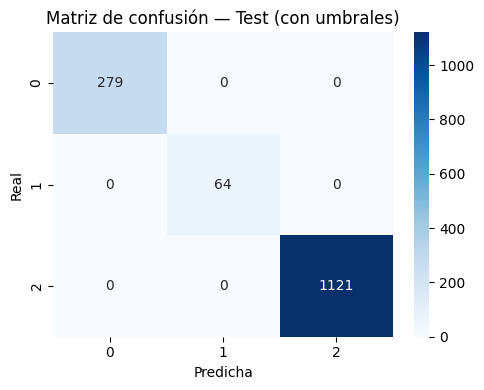


Reporte por clase (con umbrales):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00      1121

    accuracy                           1.00      1464
   macro avg       1.00      1.00      1.00      1464
weighted avg       1.00      1.00      1.00      1464



In [89]:
# %% UMBRALES ÓPTIMOS POR CLASE (One-vs-Rest, max F1 en validación)
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

# 1) Separar validación desde el train balanceado (no uses el test para fijar umbrales)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_bal, y_train_bal, test_size=0.25, random_state=42, stratify=y_train_bal
)

# Re-entrenar el modelo en X_tr para validar umbrales de forma limpia
rf_th = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
rf_th.fit(X_tr, y_tr)

# Probabilidades en validación y prueba
proba_val = rf_th.predict_proba(X_val)
proba_test = rf_th.predict_proba(X_test_p)

classes = np.unique(y_train_bal)
y_val_bin = label_binarize(y_val, classes=classes)

def best_threshold_per_class(y_true_bin, proba, cls_index):
    """Devuelve el umbral que maximiza F1 para la clase cls_index (OvR) en validación."""
    prec, rec, thr = precision_recall_curve(y_true_bin[:, cls_index], proba[:, cls_index])
    # precision_recall_curve devuelve len(thr) = len(prec)-1 = len(rec)-1
    # F1 para cada punto (evitar división por cero)
    f1_vals = 2 * (prec[:-1] * rec[:-1]) / np.clip(prec[:-1] + rec[:-1], 1e-12, None)
    best_idx = int(np.nanargmax(f1_vals))
    return float(thr[best_idx]), float(f1_vals[best_idx]), float(prec[best_idx]), float(rec[best_idx])

# 2) Buscar umbrales por clase usando validación
thresholds = {}
rows = []
for i, c in enumerate(classes):
    t, f1b, pb, rb = best_threshold_per_class(y_val_bin, proba_val, i)
    thresholds[c] = t
    rows.append({"Clase": int(c), "Umbral*": round(t, 4), "F1_val": round(f1b, 4),
                 "Prec_val": round(pb, 4), "Rec_val": round(rb, 4)})

umbrales_df = pd.DataFrame(rows).sort_values("Clase")
print("\n=== UMBRALES ÓPTIMOS POR CLASE (validación, max F1 OvR) ===")
print(umbrales_df.to_string(index=False))

# 3) Función de predicción con umbrales (si ninguna clase supera su umbral, usar argmax)
def predict_with_thresholds(proba, thresholds, classes):
    preds = []
    for row in proba:
        # clases que superan su umbral
        winners = [cls for cls, p in zip(classes, row) if p >= thresholds[cls]]
        if len(winners) == 1:
            preds.append(winners[0])
        elif len(winners) > 1:
            # si hay empates, elegir la de mayor probabilidad
            idx = np.argmax([row[list(classes).index(w)] for w in winners])
            preds.append(winners[idx])
        else:
            # ninguna supera: fallback al argmax estándar
            preds.append(classes[int(np.argmax(row))])
    return np.array(preds, dtype=int)

# 4) Métricas en test usando umbrales
y_pred_std = rf_th.predict(X_test_p)                      # predicción estándar (argmax)
y_pred_thr = predict_with_thresholds(proba_test, thresholds, classes)  # con umbrales

acc_std = accuracy_score(y_test, y_pred_std)
f1m_std = f1_score(y_test, y_pred_std, average="macro")
f1w_std = f1_score(y_test, y_pred_std, average="weighted")

acc_thr = accuracy_score(y_test, y_pred_thr)
f1m_thr = f1_score(y_test, y_pred_thr, average="macro")
f1w_thr = f1_score(y_test, y_pred_thr, average="weighted")

print("\n=== COMPARATIVO EN TEST (Predicción estándar vs con umbrales) ===")
print(f"Accuracy  - std: {acc_std:.4f} | thr: {acc_thr:.4f}")
print(f"F1-macro  - std: {f1m_std:.4f} | thr: {f1m_thr:.4f}")
print(f"F1-weight - std: {f1w_std:.4f} | thr: {f1w_thr:.4f}")

# 5) Matriz de confusión con umbrales
plot_confusion(y_test, y_pred_thr, "Matriz de confusión — Test (con umbrales)")

# 6) (Opcional) reporte por clase con umbrales
print("\nReporte por clase (con umbrales):\n", classification_report(y_test, y_pred_thr))
